In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
trainDF = pd.read_csv('train.csv')
trainDF.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
trainDF.shape

(159571, 8)

In [4]:
trainDF.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [91]:
testDF = pd.read_csv('test.csv')
testDF.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [94]:
testID = testDF[['id']]

In [6]:
testDF.shape

(153164, 2)

In [7]:
trainDF

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [8]:
word = trainDF[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]

In [7]:
trainTest = pd.concat([trainDF.comment_text, testDF.comment_text], axis = 0)
trainTest = pd.DataFrame(data = trainTest)
trainTest.shape

(312735, 1)

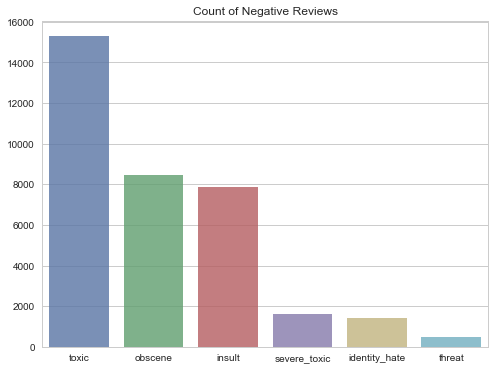

In [8]:
#count negative comments 
sentSum = trainDF[trainDF.columns[2:8]].sum().sort_values(ascending = False)

plt.figure(figsize = (8,6))
sns.set(style="whitegrid")
sns.barplot(sentSum.index, sentSum.values, alpha = 0.8).set_title('Count of Negative Reviews')
plt.show()

In [9]:
sentList = trainDF.columns[2:8]

per_sent = pd.DataFrame(sentSum / len(trainDF[sentList]), columns = ['Percentage'])
per_sent

,Percentage
toxic,0.095844
obscene,0.052948
insult,0.049364
severe_toxic,0.009996
identity_hate,0.008805
threat,0.002996


In [10]:
trainDF['multiSent'] = trainDF[sentList].sum(axis = 1)
multisent = pd.DataFrame(trainDF.multiSent.value_counts())
multisent[1:6]

,multiSent
1,6360
3,4209
2,3480
4,1760
5,385


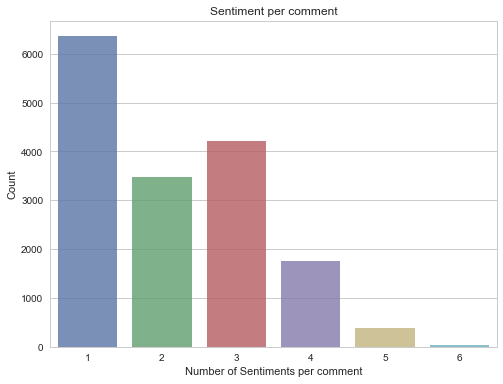

In [11]:
plt.figure(figsize = (8,6))
g = sns.barplot(multisent.index[1:7], multisent.multiSent[1:7], alpha = 0.8).set_title('Sentiment per comment')
plt.xlabel('Number of Sentiments per comment')
plt.ylabel('Count')
plt.show()

In [12]:
from nltk.tokenize import word_tokenize
#train = trainDF.iloc[:1000,1]
train = trainTest.comment_text

tokenized_docs = [word_tokenize(doc) for doc in train]
print(tokenized_docs[1])


["D'aww", '!', 'He', 'matches', 'this', 'background', 'colour', 'I', "'m", 'seemingly', 'stuck', 'with', '.', 'Thanks', '.', '(', 'talk', ')', '21:51', ',', 'January', '11', ',', '2016', '(', 'UTC', ')']


In [13]:
import re
import string
regex = re.compile('[%s]' % re.escape(string.punctuation)) #see documentation here: http://docs.python.org/2/library/string.html

tokenized_docs_no_punctuation = []

for review in tokenized_docs:
    
    new_review = []
    for token in review: 
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_review.append(new_token)
    
    tokenized_docs_no_punctuation.append(new_review)
    

In [14]:
from nltk.corpus import stopwords

tokenized_docs_no_stopwords = []
for doc in tokenized_docs_no_punctuation:
    new_term_vector = []
    for word in doc:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)
    tokenized_docs_no_stopwords.append(new_term_vector)
            

In [15]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#porter = PorterStemmer()
snowball = SnowballStemmer('english')
#wordnet = WordNetLemmatizer()

preprocessed_docs = []

for doc in tokenized_docs_no_stopwords:
    final_doc = []
    for word in doc:
        #final_doc.append(porter.stem(word))
        final_doc.append(snowball.stem(word))
        #final_doc.append(wordnet.lemmatize(word)) #note that lemmatize() can also takes part of speech as an argument!
    preprocessed_docs.append(final_doc)

#print(preprocessed_docs[0])

In [16]:
train1 = trainTest[['comment_text']]
for j in range(len(preprocessed_docs)):
    preprocessed_docs[j] = "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in preprocessed_docs[j]]).strip()
    
#train1['final'] = preprocessed_docs     

In [17]:
train1['final'] = preprocessed_docs 
train1.head(10)

,comment_text,final
0,Explanation\nWhy the edits made under my usern...,explan whi edit made usernam hardcor metallica...
1,D'aww! He matches this background colour I'm s...,daww he match background colour i seem stuck t...
2,"Hey man, I'm really not trying to edit war. It...",hey man i realli tri edit war it guy constant ...
3,"""\nMore\nI can't make any real suggestions on ...",more i ca nt make real suggest improv i wonder...
4,"You, sir, are my hero. Any chance you remember...",you sir hero ani chanc rememb page
5,"""\n\nCongratulations from me as well, use the ...",congratul well use tool well · talk
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,cocksuck befor you piss around on my work
7,Your vandalism to the Matt Shirvington article...,your vandal matt shirvington articl revert ple...
8,Sorry if the word 'nonsense' was offensive to ...,sorri word nonsens offens anyway i intend writ...
9,alignment on this subject and which are contra...,align subject contrari dulithgow


In [18]:
train1.shape

(312735, 2)

In [19]:
train_all = train1.iloc[:159571]

In [20]:
test_all = train1.iloc[159571:]

In [21]:
test_all.head()

,comment_text,final
0,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succes ever what hate sad mof...
1,== From RfC == \n\n The title is fine as it is...,from rfc the titl fine imo
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",sourc zaw ashton lapland —
3,":If you have a look back at the source, the in...",if look back sourc inform i updat correct form...
4,I don't anonymously edit articles at all.,i nt anonym edit articl


In [22]:
test_all.shape

(153164, 2)

In [23]:
train_all.tail()

,comment_text,final
159566,""":::::And for the second time of asking, when ...",and second time ask view complet contradict co...
159567,You should be ashamed of yourself \n\nThat is ...,you asham that horribl thing put talk page 128...
159568,"Spitzer \n\nUmm, theres no actual article for ...",spitzer umm there actual articl prostitut ring...
159569,And it looks like it was actually you who put ...,and look like actual put speedi first version ...
159570,"""\nAnd ... I really don't think you understand...",and i realli nt think understand i came idea b...


In [24]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [25]:
def top_overall_words(text, features, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in ids. '''
    D = text
    D[D < min_tfidf] = 0 # so common words across all documents won't dominate - may remove
    tfidf_mean = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_mean, features, top_n)

In [26]:
def tfidf_generator(lem_comb):
    tfidf = TfidfVectorizer(ngram_range=(1,2),
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1)
    text_tfidf = tfidf.fit_transform(lem_comb)
    dense_text = text_tfidf.todense()
    dense_text2 = np.squeeze(np.asarray(dense_text))
    features = tfidf.get_feature_names()
    return top_overall_words(dense_text2, features)

### MODEL

In [17]:
clean = pd.read_csv('cleanText.csv')

In [18]:
train_all = clean.iloc[:159571]
test_all = clean.iloc[159571:]

In [11]:
print(train_all.shape,test_all.shape)

(159571, 2) (153164, 2)


In [20]:
train_all.final

0         explan whi edit made usernam hardcor metallica...
1         daww he match background colour i seem stuck t...
2         hey man i realli tri edit war it guy constant ...
3         more i ca nt make real suggest improv i wonder...
4                        you sir hero ani chanc rememb page
5                       congratul well use tool well · talk
6                 cocksuck befor you piss around on my work
7         your vandal matt shirvington articl revert ple...
8         sorri word nonsens offens anyway i intend writ...
9                          align subject contrari dulithgow
10        fair use rational imag wonjujpg thank upload i...
11                         bbq man let discuss itmayb phone
12        hey talk what exclus group wp taliban good des...
13        befor start throw accus warn let review edit i...
14        oh girl start argument she stuck nose nt belon...
15        juelz santana age in 2002 juelz santana 18 yea...
16                bye do nt look come th

In [12]:
train_final_1 = pd.concat([train_all,word], axis=1)

In [13]:
train_final_1.head()

,comment_text,final,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,explan whi edit made usernam hardcor metallica...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,daww he match background colour i seem stuck t...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",hey man i realli tri edit war it guy constant ...,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",more i ca nt make real suggest improv i wonder...,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",you sir hero ani chanc rememb page,0,0,0,0,0,0


In [21]:
vec = TfidfVectorizer(ngram_range=(1,2),
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
trn_term_doc =vec.fit_transform(train_all['final'].values.astype('U'))
test_term_doc = vec.transform(test_all['final'].values.astype('U'))

/Users/joshualee/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [25]:
from sklearn.model_selection import train_test_split
x = trn_term_doc
y_toxic = train_final_1.toxic
x_train, x_test, y_train, y_test = train_test_split(x, y_toxic, test_size=0.2, random_state=10)

### Toxic Logistic Regression 

In [71]:
from sklearn import linear_model
logit = linear_model.LogisticRegression()

In [72]:
logit.set_params(C=1e4)
logit.fit(x_train, y_train)
print([logit.coef_, logit.intercept_])
print(logit.score(x_train, y_train))

[array([[-2.52008323e-01, -1.03993098e+00, -2.35812728e-04, ...,
        -5.61235238e-01, -3.77593356e-01, -1.24450809e-03]]), array([-6.43975579])]
0.9998354953938711


In [73]:
print(logit.score(x_test, y_test))

0.9909133636221212


In [74]:
from sklearn.model_selection import GridSearchCV

grid_para_log = [{
    "C": [1,10,100,1000,10000],
    "dual": [True, False],
    "fit_intercept": [True, False]}]
grid_search_log = GridSearchCV(logit, grid_para_log, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_log.fit(x_train,  y_train.values.ravel())

CPU times: user 19.2 s, sys: 1.47 s, total: 20.7 s
Wall time: 12min 7s


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000, 10000], 'dual': [True, False], 'fit_intercept': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [75]:
grid_search_log.best_params_


{'C': 10, 'dual': True, 'fit_intercept': True}

In [76]:
grid_search_log.best_score_

0.9919314407470076

In [77]:
grid_search_log.score(x_test, y_test) # accuracy


0.9924800250665831

In [78]:
grid_search_log.predict_proba(test_term_doc)

array([[4.56405989e-01, 5.43594011e-01],
       [9.98802646e-01, 1.19735447e-03],
       [9.99375361e-01, 6.24639344e-04],
       ...,
       [9.99408985e-01, 5.91014876e-04],
       [9.90883849e-01, 9.11615065e-03],
       [9.94017469e-01, 5.98253126e-03]])

In [99]:
toxicProb = grid_search_log.predict_proba(test_term_doc)
toxicProb = pd.DataFrame(toxicProb, columns = ['Non-Toxic', 'toxic'])
del toxicProb['Non-Toxic']
toxicProb.head()



,toxic
0,0.543594
1,0.001197
2,0.000625
3,0.000419
4,0.000294


### severe_toxic Logistic Regression

In [79]:
logit_1 = linear_model.LogisticRegression()

In [80]:
from sklearn.model_selection import train_test_split
y_severe_toxic = train_final_1.severe_toxic
x_train, x_test, y_train, y_test = train_test_split(x, y_severe_toxic, test_size=0.2, random_state=10)

In [81]:
logit_1.set_params(C=1e4)
logit_1.fit(x_train, y_train)
print([logit_1.coef_, logit_1.intercept_])
print(logit_1.score(x_train, y_train))

[array([[ 4.89284188e+00, -2.36688995e-01, -3.47946533e-04, ...,
        -3.33983588e-02, -3.71580159e-02, -4.70231212e-03]]), array([-8.26960976])]
0.9996161559190324


In [82]:
from sklearn.model_selection import GridSearchCV

grid_para_log = [{
    "C": [1,10,100,1000,10000],
    "dual": [True, False],
    "fit_intercept": [True, False]}]
grid_search_log_1 = GridSearchCV(logit_1, grid_para_log, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_log_1.fit(x_train,  y_train.values.ravel())

CPU times: user 15.6 s, sys: 1.98 s, total: 17.6 s
Wall time: 14min 54s


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000, 10000], 'dual': [True, False], 'fit_intercept': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [83]:
grid_search_log_1.best_params_


{'C': 1, 'dual': True, 'fit_intercept': True}

In [84]:
grid_search_log_1.best_score_

0.9902158927116625

In [85]:
grid_search_log_1.score(x_test, y_test) # accuracy


0.9911953626821244

In [86]:
grid_search_log_1.predict_proba(test_term_doc)

array([[0.84193318, 0.15806682],
       [0.9957    , 0.0043    ],
       [0.99641804, 0.00358196],
       ...,
       [0.99803417, 0.00196583],
       [0.99664541, 0.00335459],
       [0.99477517, 0.00522483]])

In [100]:
severe_toxicProb = grid_search_log_1.predict_proba(test_term_doc)
severe_toxicProb = pd.DataFrame(severe_toxicProb, columns = ['Non-SevereToxic', 'severe_toxic'])
del severe_toxicProb['Non-SevereToxic']
severe_toxicProb.head()


,severe_toxic
0,0.158067
1,0.004300
2,0.003582
3,0.002402
4,0.001761


### obscene Logistic Regression

In [43]:
logit_2 = linear_model.LogisticRegression()

In [44]:
from sklearn.model_selection import train_test_split
y_obscene = train_final_1.obscene
x_train, x_test, y_train, y_test = train_test_split(x, y_obscene, test_size=0.2, random_state=10)

In [45]:
logit_2.set_params(C=1e4)
logit_2.fit(x_train, y_train)
print([logit_2.coef_, logit_2.intercept_])
print(logit_2.score(x_train, y_train))

[array([[-4.05262520e-01, -1.36470691e+00, -5.76866971e-04, ...,
        -1.16207497e+00, -7.50008150e-01, -8.39113597e-02]]), array([-3.0204198])]
0.9995769881556683


In [46]:
from sklearn.model_selection import GridSearchCV

grid_para_log = [{
    "C": [1,10,100,1000,10000],
    "dual": [True, False],
    "fit_intercept": [True, False]}]
grid_search_log_2 = GridSearchCV(logit_2, grid_para_log, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_log_2.fit(x_train,  y_train.values.ravel())

CPU times: user 24.2 s, sys: 1.99 s, total: 26.2 s
Wall time: 11min


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000, 10000], 'dual': [True, False], 'fit_intercept': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [47]:
grid_search_log_2.best_params_


{'C': 100, 'dual': True, 'fit_intercept': True}

In [48]:
grid_search_log_2.best_score_

0.9785752334398696

In [49]:
grid_search_log_2.score(x_test, y_test) # accuracy


0.9792574024753251

In [87]:
grid_search_log_2.predict_proba(test_term_doc)

array([[2.75333714e-07, 9.99999725e-01],
       [9.99928515e-01, 7.14849520e-05],
       [9.99327229e-01, 6.72771199e-04],
       ...,
       [9.99662482e-01, 3.37518388e-04],
       [9.99832864e-01, 1.67136417e-04],
       [2.38613472e-01, 7.61386528e-01]])

In [101]:
obsceneProb = grid_search_log_2.predict_proba(test_term_doc)
obsceneProb = pd.DataFrame(obsceneProb, columns = ['Non-obscene', 'obscene'])
del obsceneProb['Non-obscene']
obsceneProb.head()


,obscene
0,1.000000
1,0.000071
2,0.000673
3,0.000089
4,0.000706


### threat Logistic Regression

In [50]:
logit_3 = linear_model.LogisticRegression()

In [51]:
from sklearn.model_selection import train_test_split
y_threat = train_final_1.threat
x_train, x_test, y_train, y_test = train_test_split(x, y_threat, test_size=0.2, random_state=10)

In [52]:
logit_3.set_params(C=1e4)
logit_3.fit(x_train, y_train)
print([logit_3.coef_, logit_3.intercept_])
print(logit_3.score(x_train, y_train))

[array([[ 4.47794386e+00, -1.82942616e-01, -4.41040670e-04, ...,
        -1.91252734e-02, -9.25173887e-03, -1.53145545e-03]]), array([-15.1197261])]
0.9999451651312904


In [53]:
from sklearn.model_selection import GridSearchCV

grid_para_log = [{
    "C": [1,10,100,1000,10000],
    "dual": [True, False],
    "fit_intercept": [True, False]}]
grid_search_log_3 = GridSearchCV(logit_3, grid_para_log, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_log_3.fit(x_train,  y_train.values.ravel())

CPU times: user 25.2 s, sys: 1.37 s, total: 26.6 s
Wall time: 10min 54s


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000, 10000], 'dual': [True, False], 'fit_intercept': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [54]:
grid_search_log_3.best_params_


{'C': 10000, 'dual': True, 'fit_intercept': True}

In [55]:
grid_search_log_3.best_score_

0.9973757598546092

In [56]:
grid_search_log_3.score(x_test, y_test) # accuracy


0.9968353438821871

In [88]:
grid_search_log_3.predict_proba(test_term_doc)

array([[9.99948936e-01, 5.10643518e-05],
       [9.99999620e-01, 3.80491449e-07],
       [9.99999923e-01, 7.67365081e-08],
       ...,
       [9.99999842e-01, 1.57887268e-07],
       [9.99996633e-01, 3.36709880e-06],
       [9.99985964e-01, 1.40357009e-05]])

In [102]:
threatProb = grid_search_log_3.predict_proba(test_term_doc)
threatProb = pd.DataFrame(threatProb, columns = ['Non-threat', 'threat'])
del threatProb['Non-threat']
threatProb.head()


,threat
0,5.106435e-05
1,3.804914e-07
2,7.673651e-08
3,3.924967e-07
4,1.212771e-07


### insult Logistic Regression

In [57]:
logit_4 = linear_model.LogisticRegression()

In [58]:
from sklearn.model_selection import train_test_split
y_insult = train_final_1.insult
x_train, x_test, y_train, y_test = train_test_split(x, y_insult, test_size=0.2, random_state=10)

In [59]:
logit_4.set_params(C=1e4)
logit_4.fit(x_train, y_train)
print([logit_4.coef_, logit_4.intercept_])
print(logit_4.score(x_train, y_train))

[array([[-0.03639103,  0.91811563, -0.00146312, ..., -0.23727894,
        -0.18589319, -0.12510039]]), array([-8.22501103])]
0.9994124835495394


In [60]:
from sklearn.model_selection import GridSearchCV

grid_para_log = [{
    "C": [1,10,100,1000,10000],
    "dual": [True, False],
    "fit_intercept": [True, False]}]
grid_search_log_4 = GridSearchCV(logit_4, grid_para_log, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_log_4.fit(x_train,  y_train.values.ravel())

CPU times: user 19 s, sys: 1.49 s, total: 20.5 s
Wall time: 15min 52s


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000, 10000], 'dual': [True, False], 'fit_intercept': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [61]:
grid_search_log_4.best_params_

{'C': 10, 'dual': True, 'fit_intercept': True}

In [62]:
grid_search_log_4.best_score_

0.9715720373503791

In [63]:
grid_search_log_4.score(x_test, y_test) # accuracy


0.9698574338085539

In [89]:
grid_search_log_4.predict_proba(test_term_doc)

array([[0.00233749, 0.99766251],
       [0.99748021, 0.00251979],
       [0.99572946, 0.00427054],
       ...,
       [0.99878523, 0.00121477],
       [0.99590764, 0.00409236],
       [0.54905058, 0.45094942]])

In [103]:
insultProb = grid_search_log_4.predict_proba(test_term_doc)
insultProb = pd.DataFrame(insultProb, columns = ['Non-insult', 'insult'])
del insultProb['Non-insult']
insultProb.head()


,insult
0,0.997663
1,0.002520
2,0.004271
3,0.001394
4,0.008300


### identity_hate

In [64]:
logit_5 = linear_model.LogisticRegression()

In [65]:
from sklearn.model_selection import train_test_split
y_identity_hate = train_final_1.identity_hate
x_train, x_test, y_train, y_test = train_test_split(x, y_identity_hate, test_size=0.2, random_state=10)

In [66]:
logit_5.set_params(C=1e4)
logit_5.fit(x_train, y_train)
print([logit_5.coef_, logit_5.intercept_])
print(logit_5.score(x_train, y_train))

[array([[-2.52008323e-01, -1.03993098e+00, -2.35812728e-04, ...,
        -5.61235238e-01, -3.77593356e-01, -1.24450809e-03]]), array([-6.43975579])]
0.9998354953938711


In [67]:
from sklearn.model_selection import GridSearchCV

grid_para_log = [{
    "C": [1,10,100,1000,10000],
    "dual": [True, False],
    "fit_intercept": [True, False]}]
grid_search_log_5 = GridSearchCV(logit_5, grid_para_log, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_log_5.fit(x_train,  y_train.values.ravel())

CPU times: user 18.5 s, sys: 1.55 s, total: 20.1 s
Wall time: 10min 48s


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000, 10000], 'dual': [True, False], 'fit_intercept': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [68]:
grid_search_log_5.best_params_

{'C': 10, 'dual': True, 'fit_intercept': True}

In [69]:
grid_search_log_5.best_score_

0.9919314407470076

In [70]:
grid_search_log_5.score(x_test, y_test) # accuracy


0.9924800250665831

In [90]:
grid_search_log_5.predict_proba(test_term_doc)

array([[4.56405691e-01, 5.43594309e-01],
       [9.98802641e-01, 1.19735925e-03],
       [9.99375359e-01, 6.24641372e-04],
       ...,
       [9.99408983e-01, 5.91016973e-04],
       [9.90883823e-01, 9.11617689e-03],
       [9.94017449e-01, 5.98255101e-03]])

In [104]:
identity_hateProb = grid_search_log_5.predict_proba(test_term_doc)
identity_hateProb = pd.DataFrame(identity_hateProb, columns = ['Non-identity_hate', 'identity_hate'])
del identity_hateProb['Non-identity_hate']
identity_hateProb.head()


,identity_hate
0,0.543594
1,0.001197
2,0.000625
3,0.000419
4,0.000294


In [105]:
FINAL = pd.concat([testID, toxicProb, severe_toxicProb, obsceneProb, threatProb, insultProb, identity_hateProb], axis = 1)
FINAL.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.543594,0.158067,1.000000,5.106435e-05,0.997663,0.543594
1,0000247867823ef7,0.001197,0.004300,0.000071,3.804914e-07,0.002520,0.001197
2,00013b17ad220c46,0.000625,0.003582,0.000673,7.673651e-08,0.004271,0.000625
3,00017563c3f7919a,0.000419,0.002402,0.000089,3.924967e-07,0.001394,0.000419
4,00017695ad8997eb,0.000294,0.001761,0.000706,1.212771e-07,0.008300,0.000294


In [106]:
FINAL.to_csv('sentiment.csv', index = False)